Data: [fma](https://github.com/mdeff/fma) fma_metadata.zip/features.csv <br>
노래와 관련된 데이터를 이용하여 비슷한 노래 추천 <br>
PCA, 코사인 유사도

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
feature_path = '/hdd/data/adp_data/fma_metadata/features.csv'

meta = pd.read_csv(feature_path, nrows = 3, header = None)

columns = []
for feat, stat, num in zip(meta.iloc[0, 1:], meta.iloc[1, 1:], meta.iloc[2, 1:]):
    col_name = f'{feat}_{stat}'
    columns.append(col_name)

df = pd.read_csv(feature_path, skiprows = 4, index_col = 0, header = None)
df.columns = columns
df.index.name = 'track_id'

df.head()

,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,chroma_cens_kurtosis,...,tonnetz_std,tonnetz_std,tonnetz_std,zcr_kurtosis,zcr_max,zcr_mean,zcr_median,zcr_min,zcr_skew,zcr_std
track_id,,,,,,,,,,,,,,,,,,,,,
2,7.180653,5.230309,0.249321,1.347620,1.482478,0.531371,1.481593,2.691455,0.866868,1.341231,...,0.054125,0.012226,0.012111,5.758890,0.459473,0.085629,0.071289,0.000000,2.089872,0.061448
3,1.888963,0.760539,0.345297,2.295201,1.654031,0.067592,1.366848,1.054094,0.108103,0.619185,...,0.063831,0.014212,0.017740,2.824694,0.466309,0.084578,0.063965,0.000000,1.716724,0.069330
5,0.527563,-0.077654,-0.279610,0.685883,1.937570,0.880839,-0.923192,-0.927232,0.666617,1.038546,...,0.040730,0.012691,0.014759,6.808415,0.375000,0.053114,0.041504,0.000000,2.193303,0.044861
10,3.702245,-0.291193,2.196742,-0.234449,1.367364,0.998411,1.770694,1.604566,0.521217,1.982386,...,0.074358,0.017952,0.013921,21.434212,0.452148,0.077515,0.071777,0.000000,3.542325,0.040800
20,-0.193837,-0.198527,0.201546,0.258556,0.775204,0.084794,-0.289294,-0.816410,0.043851,-0.804761,...,0.095003,0.022492,0.021355,16.669037,0.469727,0.047225,0.040039,0.000977,3.189831,0.030993


In [3]:
df_filled = df.fillna(0)

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_filled)

In [5]:
pca = PCA()
x_pac = pca.fit_transform(df_scaled)

print('각 주성분의 고유값 (explained_variance):', end = '\t')
print(pca.explained_variance_)
print('각 주성분이 설명하는 분산 비율 (explained_variance_ratio):', end = '\t')
print(pca.explained_variance_ratio_)
print('누적 설명 분산 비율:', end = '\t')
print((pca.explained_variance_ratio_.cumsum()))

각 주성분의 고유값 (explained_variance):	[6.20632442e+01 3.52369852e+01 2.17303343e+01 1.74179572e+01
 1.53771434e+01 1.44333622e+01 1.30528265e+01 1.24465139e+01
 1.17565876e+01 1.09243981e+01 9.35438519e+00 8.20415810e+00
 7.47229562e+00 7.07858949e+00 6.71493600e+00 6.45092404e+00
 5.58836723e+00 5.55124603e+00 5.25170088e+00 4.74294663e+00
 4.45586171e+00 4.41658279e+00 4.15827334e+00 4.11853237e+00
 3.76799825e+00 3.71099414e+00 3.56418178e+00 3.40814834e+00
 3.37613311e+00 3.18030980e+00 3.09164115e+00 2.99561801e+00
 2.83357884e+00 2.75363014e+00 2.61922541e+00 2.57301701e+00
 2.48907096e+00 2.44768864e+00 2.39476508e+00 2.34913480e+00
 2.24577213e+00 2.21745310e+00 2.17806639e+00 2.14757049e+00
 2.13744933e+00 2.04464378e+00 2.01628716e+00 1.95509876e+00
 1.90254754e+00 1.88286419e+00 1.82920478e+00 1.79970604e+00
 1.72603992e+00 1.70811181e+00 1.67636284e+00 1.63092562e+00
 1.59434113e+00 1.58363692e+00 1.52425814e+00 1.50185501e+00
 1.49822132e+00 1.46732521e+00 1.43763660e+00 1.4046

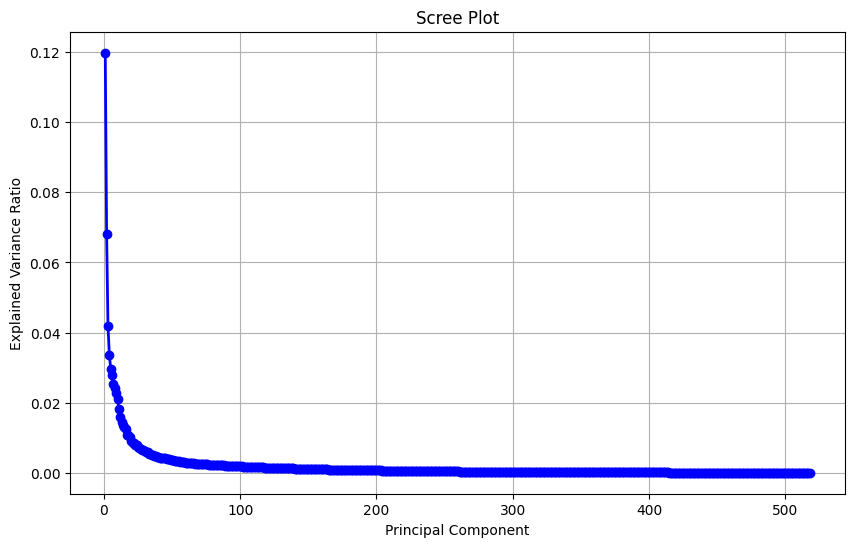

In [6]:
pc_num = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.figure(figsize = (10, 6))
plt.plot(pc_num, pca.explained_variance_ratio_, 'o-', linewidth = 2, color = 'blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# plt.xticks(pc_num)
plt.grid(True)
plt.show()

In [7]:
n_components_85 = (pca.explained_variance_ratio_.cumsum() >= 0.85).argmax() + 1
print(f'85% 이상을 설명하는 컴포넌트 수: {n_components_85}')

pca = PCA(n_components = n_components_85)
X_pac = pca.fit_transform(df_scaled)

85% 이상을 설명하는 컴포넌트 수: 113


In [ ]:
similarity_matrix = cosine_similarity(X_pac)

def recommend(track_id, top_n = 5):
    idx = df.index.get_loc(track_id)
    sim_scores = similarity_matrix[idx]

    similar_indices = np.argsort(sim_scores)[::-1][1:top_n + 1]

    return similar_indices

In [9]:
print(df.index)

Index([     2,      3,      5,     10,     20,     26,     30,     46,     48,
          134,
       ...
       155310, 155311, 155312, 155314, 155315, 155316, 155317, 155318, 155319,
       155320],
      dtype='int64', name='track_id', length=106574)


In [11]:
recommend(134)

array([17621, 18552, 87168, 80033, 59537])

코사인 유사도는 두 벡터의 각도를 이용해서 유사도를 판단하므로 feature들의 범위가 비슷하다면 스케일링이 필요하지 않음. PCA를 진행해서 스케일링도 진행함.